# **1) Importing Libraries**

In [ ]:
import numpy as np #importing necessary libraries 
import pandas as pd
from google.colab import files #uploading dataset
upload = files.upload()

# **2) Preparing dataset and creating numpy arrays and dataframes**

In [ ]:
df = pd.read_csv('Dataset.csv')

In [ ]:
df.head()

,ri,Label
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [ ]:
X = np.array(df['ri'])
y = np.array(df['Label'])

In [ ]:
print(X.shape)
print(y.shape)

(4600,)
(4600,)


In [ ]:
df.shape

(4600, 2)

# **3) Importing Deeplearning tools (Tensorflow and keras)**

In [ ]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers

# **4) Creating model for ANN**

In [ ]:
model = models.Sequential([
     layers.Dense(7, activation='tanh', input_dim=1),
     layers.Dense(1, activation='sigmoid'),                      
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3680,)
(920,)
(3680,)
(920,)


In [ ]:
X_train.transpose()
X_train.shape

(3680,)

In [ ]:
history = model.fit(X_train,y_train,epochs = 100, batch_size = 10)

Epoch 1/100
368/368 [==============================] - 0s 767us/step - loss: 0.5741 - accuracy: 0.7668
Epoch 2/100
368/368 [==============================] - 0s 788us/step - loss: 0.3521 - accuracy: 0.8745
Epoch 3/100
368/368 [==============================] - 0s 804us/step - loss: 0.2847 - accuracy: 0.8791
Epoch 4/100
368/368 [==============================] - 0s 788us/step - loss: 0.2600 - accuracy: 0.8791
Epoch 5/100
368/368 [==============================] - 0s 785us/step - loss: 0.2484 - accuracy: 0.8791
Epoch 6/100
368/368 [==============================] - 0s 889us/step - loss: 0.2417 - accuracy: 0.8791
Epoch 7/100
368/368 [==============================] - 0s 841us/step - loss: 0.2369 - accuracy: 0.8791
Epoch 8/100
368/368 [==============================] - 0s 893us/step - loss: 0.2336 - accuracy: 0.8791
Epoch 9/100
368/368 [==============================] - 0s 835us/step - loss: 0.2311 - accuracy: 0.8791
Epoch 10/100
368/368 [==============================] - 0s 765us/step - l

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred.round())
print(cm)

[[600 105]
 [  0 215]]


In [ ]:
X_LSTM =  X_train
X_LSTM_test = X_test

In [ ]:
X_LSTM=X_LSTM.reshape(3680,1,1)
X_LSTM_test=X_LSTM_test.reshape(920,1,1)

In [ ]:
import matplotlib.pyplot as plt

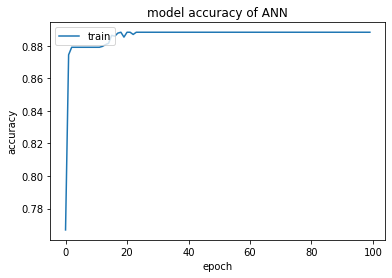

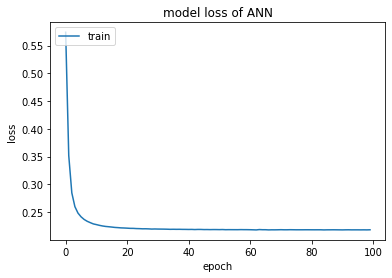

In [ ]:
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy of ANN')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
#plt.plot(history_LSTM.history['val_loss'])
plt.title('model loss of ANN')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# **5) Creating model for LSTM**

In [ ]:
from keras.layers import LSTM
model_LSTM = models.Sequential()  
model_LSTM.add(LSTM((1), input_shape=(2,1), kernel_initializer='uniform', activation='sigmoid'))
model_LSTM.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history_LSTM=model_LSTM.fit(X_LSTM, y_train, epochs=100, batch_size=150,verbose=2)

Epoch 1/100
25/25 - 0s - loss: 0.5190 - accuracy: 0.7617
Epoch 2/100
25/25 - 0s - loss: 0.4690 - accuracy: 0.8486
Epoch 3/100
25/25 - 0s - loss: 0.4423 - accuracy: 0.8690
Epoch 4/100
25/25 - 0s - loss: 0.4371 - accuracy: 0.8668
Epoch 5/100
25/25 - 0s - loss: 0.4334 - accuracy: 0.8660
Epoch 6/100
25/25 - 0s - loss: 0.4300 - accuracy: 0.8677
Epoch 7/100
25/25 - 0s - loss: 0.4270 - accuracy: 0.8668
Epoch 8/100
25/25 - 0s - loss: 0.4242 - accuracy: 0.8652
Epoch 9/100
25/25 - 0s - loss: 0.4215 - accuracy: 0.8644
Epoch 10/100
25/25 - 0s - loss: 0.4190 - accuracy: 0.8641
Epoch 11/100
25/25 - 0s - loss: 0.4165 - accuracy: 0.8644
Epoch 12/100
25/25 - 0s - loss: 0.4142 - accuracy: 0.8647
Epoch 13/100
25/25 - 0s - loss: 0.4120 - accuracy: 0.8644
Epoch 14/100
25/25 - 0s - loss: 0.4099 - accuracy: 0.8641
Epoch 15/100
25/25 - 0s - loss: 0.4078 - accuracy: 0.8641
Epoch 16/100
25/25 - 0s - loss: 0.4058 - accuracy: 0.8639
Epoch 17/100
25/25 - 0s - loss: 0.4039 - accuracy: 0.8633
Epoch 18/100
25/25 - 0s

In [ ]:
y_pred_LSTM = model_LSTM.predict(X_LSTM_test)

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred.round())
print(cm)

[[600 105]
 [  0 215]]


# **6) Comapring the accuracy of both ANN and LSTM**

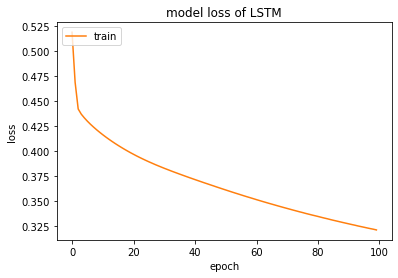

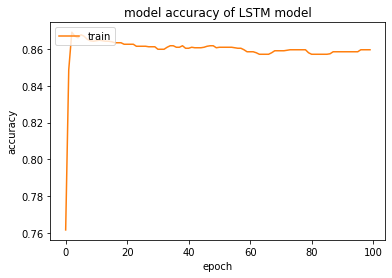

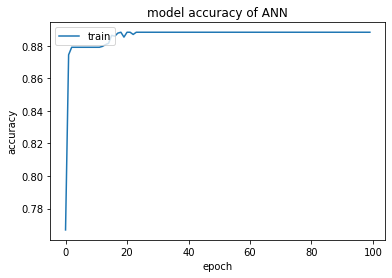

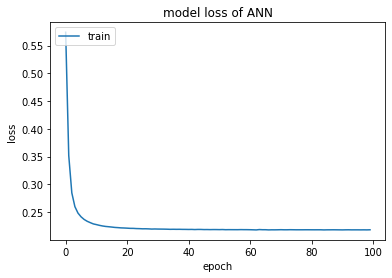

In [ ]:
plt.plot(history_LSTM.history['loss'], color ='tab:orange')
#plt.plot(history_LSTM.history['val_loss'])
plt.title('model loss of LSTM')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history_LSTM.history['accuracy'], color ='tab:orange')
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy of LSTM model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy of ANN')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
#plt.plot(history_LSTM.history['val_loss'])
plt.title('model loss of ANN')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()